# Comparing numerical distributions

To get us started with hypothesis testing, we will look at some ways to compare two numerical distributions.

---
## Independent samples

We use the [*independent 2-sample t-test*](https://en.wikipedia.org/wiki/Student%27s_t-test) to assess whether two independent samples have significantly different means. 

The test statistic follows a Student's t-distribution, provided that the variances of the two groups are equal.

Other variants of the t-test are applicable under different conditions.

The test statistic is

$$ t = \frac{\bar{x}_{1} - \bar{x}_{2}}{s_p \cdot \sqrt{\frac{1}{n_{1}} + \frac{1}{n_{2}}}} $$

where

$$ s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}} $$

is an estimator of the pooled standard deviation.

Under the null hypothesis of equal means, the statistic follows a Student's t-distribution with $(n_{1} + n_{2} - 2)$ degrees of freedom.

#### Assumptions

- The means of the two samples follow normal distributions. This is true if the populations themselves are normal, but also true for any other distribution if $n$ is large enough ($n \gt 30$).
- The two populations have equal variance.
- The two samples are independent.

Two-sample t-tests are robust to moderate deviations from these assumptions, but major deviations may produce misleading results.

### Example

The birth weights of babies (in kg) have been measured for a sample of mothers split into two categories: nonsmoking and heavy smoking. The data are found in the file *birthweight.csv*.



We want to know whether there is a significant difference in mean birth weight between the two categories. 

Write down the hypotheses:

* $H_0$: there is no difference in mean birth weight between the two populations, $\mu_{smoking} = \mu_{nonsmoking}$
* $H_1$: there is a real difference between the two populations, $\mu_{smoking} \ne \mu_{nonsmoking}$

choose a significance level:
$\alpha = 0.05$

Now we are ready to look at the data.

In [1]:
import pandas as pd
data = pd.read_csv('Data/birthweight.csv')
data.head()

,smoking,birthweight
0,False,3.99
1,False,3.79
2,False,3.60
3,False,3.73
4,False,3.21


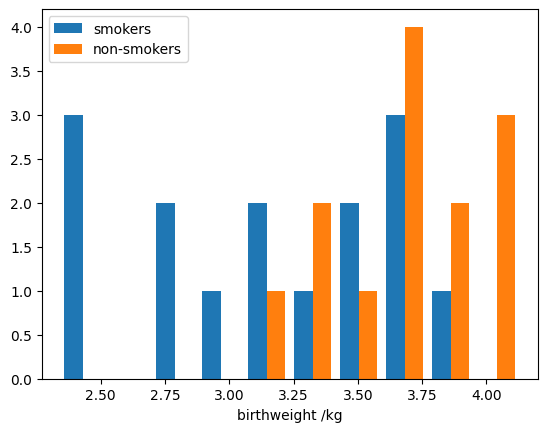

In [2]:
import matplotlib.pyplot as plt

plt.hist([data.query('smoking == True').birthweight, 
          data.query('smoking == False').birthweight], 
         label=['smokers','non-smokers'])
plt.xlabel('birthweight /kg')
plt.legend()
plt.show()

In [3]:
data.groupby('smoking').mean()

,birthweight
smoking,
False,3.667692
True,3.152000


There is clearly some difference in the sample means. However, with not many data in the study, we need to demonstrate that the difference is meaningful and not just due to random chance.

In [4]:
from scipy.stats import ttest_ind
ttest_ind( data.query('smoking == True').birthweight,
           data.query('smoking == False').birthweight )

TtestResult(statistic=np.float64(-3.1792634349413422), pvalue=np.float64(0.0037925803848699916), df=np.float64(26.0))

The p-value is less than our chosen significance level, so we reject the null hypothesis. We can report that there is a significant difference between the population means.

### Exercise
Is there a significant difference between the sepal widths of the species *Iris versicolor* and *Iris virginica*? (the data is in [iris.csv](Data/iris.csv))

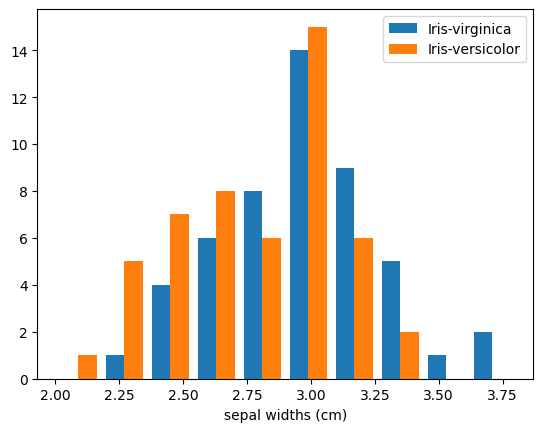

TtestResult(statistic=np.float64(3.2057607502218186), pvalue=np.float64(0.0018191004238894803), df=np.float64(98.0))

In [12]:
iris = pd.read_csv("Data/iris.csv")

plt.hist([  iris[iris["species"] == "Iris-virginica"]["sepal_width"],
            iris[iris["species"] == "Iris-versicolor"]["sepal_width"]], 
            label=['Iris-virginica','Iris-versicolor'])
plt.xlabel('sepal widths (cm)')
plt.legend()
plt.show()

ttest_ind(  iris[iris["species"] == "Iris-virginica"]["sepal_width"],
            iris[iris["species"] == "Iris-versicolor"]["sepal_width"])


---


## Paired samples

Sometimes we have two samples with paired observations (for example, luminosity of the same set of stars, as measured on two different dates). This situation requires testing whether the *mean of the differences* between pairs is zero, which is called a [*paired two-sample t-test*](https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples). 

This test can be done using [`scipy.stats.ttest_rel()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel)



### Example

200 volunteers played a video game followed by a puzzle game. 
The file *games.csv* contains their scores.

Is one of the games more difficult than the other?

Notice that in this example the two sets of scores are *not* independent of each other, because the volunteers were the same for both games. We need to use the paired-sample version of the t-test.

Write down the hypotheses:

* $H_0$: the mean of the differences in score for the two games is zero, $\mu_{\text{diff}} = 0$
* $H_1$: the mean of the differences in score for the two games is not zero, $\mu_{\text{diff}} \ne 0$

Choose a significance level:
$\alpha = 0.05$

Visualise the data:

In [13]:
scores = pd.read_csv('Data/games.csv')
scores.head()

,video,puzzle
0,47,57
1,63,61
2,58,31
3,53,56
4,53,61


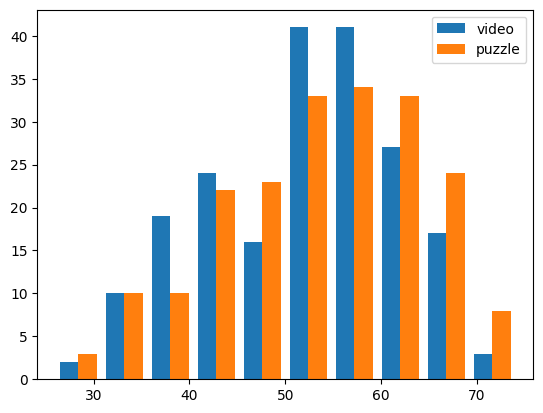

In [14]:
plt.hist([scores.video, scores.puzzle], 
         label=['video','puzzle'])
plt.legend()
plt.show()

In [15]:
scores['difference'] = scores.puzzle - scores.video
scores.head()

,video,puzzle,difference
0,47,57,10
1,63,61,-2
2,58,31,-27
3,53,56,3
4,53,61,8


In [16]:
scores.difference.mean()

np.float64(0.555)

Carry out the hypothesis test:

In [17]:
from scipy.stats import ttest_rel
ttest_rel(scores.video, scores.puzzle)

TtestResult(statistic=np.float64(-0.7338002375049547), pvalue=np.float64(0.4639341426202652), df=np.int64(199))

$p > \alpha$ therefore we cannot reject the null hypothesis. The mean of the differences is not significantly difference from zero, so there is no evidence that one game is harder than the other.

---
## Alternatives to the t-test

### Mann-Whitney U-test

For non-normal samples where $n$ is small, the assumptions of the t-test break down. However, we can use a *non-parametric test* to compare two samples, whatever the shape of their distributions.

The [*Mann-Whitney U-test*](https://en.wikipedia.org/wiki/Mann–Whitney_U_test) (aka Wilcoxon rank-sum test) is one such test. The null hypothesis for this test is that a randomly selected value from sample 1 is equally likely to be less than or greater than a randomly selected value from sample 2. If the distributions are sufficiently different, the resulting p-value will be small and we will reject this null hypothesis. Note that the U-test does not compare the sample means directly. 

This test is implemented as [`scipy.stats.mannwhitneyu()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu)


### Wilcoxon signed-rank test

The [*Wilcoxon signed-rank test*](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) is is the paired-sample version of the Mann-Whitney U-test.

This test is implemented as [`scipy.stats.wilcoxon()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon)


### Exercise

The UN Kyoto protocol was adopted in 1997 and commits developed countries to limit and reduce their greenhouse gas emissions. Due to the complexities of the ratification process, it did not come into force until 2005.

Did the CO2 outputs of western European countries change significantly between 1997 and 2005?

---